In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
import librosa.display
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, \
    LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [10]:
DATA_DIR = 'C:/Users/vaibh/Desktop/Requirements/Training Audios/DC_male/'

In [4]:
random_file = rn.choice(os.listdir(DATA_DIR))

In [22]:
wav, sr = librosa.load(DATA_DIR + random_file)
print ('sr:', sr)
print ('wav shape:', wav.shape)
print ('length:', wav.shape[0]/float(sr), 'secs')

sr: 22050
wav shape: (125390,)
length: 5.686621315192744 secs


In [24]:
wav, sr = librosa.load(DATA_DIR + random_file, sr=None)
print ('sr:', sr)
print ('wav shape:', wav.shape)
print ('length:', wav.shape[0]/float(sr), 'secs')

sr: 44100
wav shape: (250779,)
length: 5.686598639455783 secs


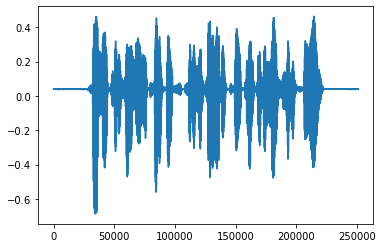

In [25]:
plt.plot(wav)

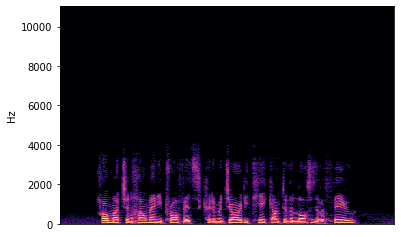

In [28]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')

In [11]:
X = []
y = []
spectrogram = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))

In [12]:
DATA_DIR2 = 'C:/Users/vaibh/Desktop/Requirements/Training Audios/JE_male/'
DATA_DIR3 = 'C:/Users/vaibh/Desktop/Requirements/Training Audios/JK_male/'
DATA_DIR4 = 'C:/Users/vaibh/Desktop/Requirements/Training Audios/KL_male/'

In [13]:
for fname in os.listdir(DATA_DIR):
     digit = 0
     wav, sr = librosa.load(DATA_DIR + fname)
     padded = pad(wav, 30000)
     spectrogram = np.abs(librosa.stft(wav))
     X.append(padded)
     y.append(digit)
    
for fname in os.listdir(DATA_DIR2):
     digit = 1
     wav, sr = librosa.load(DATA_DIR + fname)
     padded = pad(wav, 30000)
     spectrogram = np.abs(librosa.stft(wav))
     X.append(padded)
     y.append(digit)
        
for fname in os.listdir(DATA_DIR3):
     digit = 2
     wav, sr = librosa.load(DATA_DIR + fname)
     padded = pad(wav, 30000)
     spectrogram = np.abs(librosa.stft(wav))
     X.append(padded)
     y.append(digit)
      
for fname in os.listdir(DATA_DIR4):
     digit = 3
     wav, sr = librosa.load(DATA_DIR + fname)
     padded = pad(wav, 30000)
     spectrogram = np.abs(librosa.stft(wav))
     X.append(padded)
     y.append(digit)    

In [14]:
y = to_categorical(np.array(y))
X = np.vstack(X)

In [15]:
X = np.vstack(X)
y = np.array(y)
print ('X:', X.shape)
print ('y:', y.shape)

X: (480, 30000)
y: (480, 4)


In [16]:
ip = Input(shape=(X[0].shape))
hidden = Dense(128, activation='relu')(ip)
op = Dense(4, activation='softmax')(hidden)
model = Model(input=ip, output=op)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 3,840,644
Trainable params: 3,840,644
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X,
          y,
          epochs=10,
          batch_size=32, shuffle = 'true')

plt.plot(history.history['acc'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


Epoch 1/10
480/480 [==============================] - 2s 4ms/step - loss: 2.5273 - accuracy: 0.1312
Epoch 2/10
480/480 [==============================] - 0s 411us/step - loss: 1.5345 - accuracy: 0.2167
Epoch 3/10
480/480 [==============================] - 0s 415us/step - loss: 1.4344 - accuracy: 0.2417
Epoch 4/10
480/480 [==============================] - 0s 427us/step - loss: 1.4299 - accuracy: 0.2271
Epoch 5/10
480/480 [==============================] - 0s 423us/step - loss: 1.3984 - accuracy: 0.2354
Epoch 6/10
480/480 [==============================] - 0s 413us/step - loss: 1.3924 - accuracy: 0.2375
Epoch 7/10
480/480 [==============================] - 0s 431us/step - loss: 1.3931 - accuracy: 0.2458
Epoch 8/10
480/480 [==============================] - 0s 442us/step - loss: 1.3906 - accuracy: 0.2354
Epoch 9/10
480/480 [==============================] - 0s 456us/step - loss: 1.3868 - accuracy: 0.2292
Epoch 10/10
480/480 [==============================] - 0s 438us/step - loss: 1.3867

KeyError: 'acc'

In [ ]:
# spectrography and fourier trasform use remaining